# Chapter 1 - Data Exploration & Data Visualisation

This chapter is the first step in understanding the Car Sales Industry within Maryland. The components of the database schema are going to be explored. Understanding how these values have changed over time will lay a good foundation for the seasonality exploration that will take place in chapter 2. This chapter is focused on visualisation which focuses on identifying overall trends and gaining an understanding of any underlying patterns.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import seaborn as sns
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [56]:
#Load in the datasets that have been joined in SQL so that all variables have been included
#This file is found in R_files in chapter 1 yearly cars sold as cars_sold_economic_socioeconomic_data.csv
monthly_data = pd.read_csv('/Users/ben_nicholson/Visual_Code_Projects/Personal_Projects/Maryland Car Sales Data/maryland_economics_database/combined_tables/monthly_car_sales_all_data.csv')
#This is going to set the index to month so that you can sense of the data easier
monthly_data.set_index(monthly_data['month'],inplace=True)
#The column month remains in the dataframe so it needs to be deleted
monthly_data.drop(columns='month',inplace=True)
#The month also needs to viewed as datetime so that it can graphed as a time series
monthly_data.index = pd.to_datetime(monthly_data.index)
monthly_data

,new_cars_sold,used_cars_sold,values_new_cars_sold,value_used_cars_sold,total_cars_sold,total_value_cars_sold,inflation_rate_cpi,unemployment_rate_not_sa,unemployment_rate_sa
month,,,,,,,,,
2002-01-01,31106,49927,755015820,386481929,81033,1141497749,2.6,5.5,5.0
2002-02-01,27520,50982,664454223,361353242,78502,1025807465,2.6,5.2,5.0
2002-03-01,34225,58794,805666244,419385387,93019,1225051631,2.4,5.1,5.0
2002-04-01,36452,59817,846368297,433061150,96269,1279429447,2.5,4.9,4.9
2002-05-01,37359,60577,855005784,442569410,97936,1297575194,2.5,4.7,4.9
...,...,...,...,...,...,...,...,...,...
2023-07-01,26360,49502,1196918451,887723892,75862,2084642343,4.7,1.7,1.8
2023-08-01,25876,52725,1222581892,908454060,78601,2131035952,4.3,1.8,1.7
2023-09-01,23892,45386,1134437699,744676584,69278,1879114283,4.1,1.8,1.6


The data that has been loaded in is the monthly car sales data that combines economic, socioeconomic data and yearly car sales data into one large table. Using Pandas you are able to select certain columns to graph. As this section is going to use a lot of scatter plots / line graphs, multiple functions need to be created to reduce the repeated code when graphing data. You can view the functions below.

### Function creation

In [57]:
#Create a function called 'scatterplot' which can be done for simple Time Series Graphs with a line connecting each point
def scatterplot(xdata,ydata,title,xlabel,ylabel,marker='o'):
    plt.figure(figsize = (12,8))
    plt.scatter(xdata,ydata)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [58]:
#Create a function called 'time_series_line' which can be done for simple Time Series Graphs with a line connecting each point
def line_time_series(xdata,ydata,title,xlabel,ylabel,marker='o'):
    plt.figure(figsize = (12,8))
    ydata.plot()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [59]:
def plot_roll_mean(df_column,window,title):

    #Look at the mean of the data
    rolmean = df_column.rolling(window).mean()

    #Plot the rolling statistics
    orig = plt.plot(df_column,color='blue',label='Original')
    mean = plt.plot(rolmean,color='red',label='Rolling Mean')
    plt.legend(loc='best')
    plt.title(title)
    plt.show(block=False)

In [60]:
#Create a function for finding the line of best fit
from sklearn.linear_model import LinearRegression

def find_line_of_best_fit(time_series):
    """
    Finds the line of best fit for a given time series data.
    
    Parameters:
        time_series (array-like): The time series data
        
    Returns:
        slope (float): The slope of the line of best fit
        intercept (float): The y-intercept of the line of best fit
    """
    # Prepare the time data
    time = np.arange(len(time_series)).reshape(-1, 1)
    
    # Create a linear regression model
    model = LinearRegression()
    
    # Fit the model to the data
    model.fit(time, time_series)
    
    # Get the slope (m) and y-intercept (b)
    slope = model.coef_[0]
    intercept = model.intercept_
    
    return slope, intercept

In [61]:
#Create a function for finding the line of best fit in between two data points
def find_line_of_best_fit_period(time_series, time_period1, time_period2):
    """
    Finds the line of best fit for a given time series data within a given time period.
    
    Parameters:
        time_series (array-like): The time series data
        time_period1: the beginning date of the line of best fit
        time_period2: the end of the line of best fit
        
    Returns:
        slope (float): The slope of the line of best fit
        intercept (float): The y-intercept of the line of best fit
    """
    time_series = time_series[time_period1:time_period2]

    # Prepare the time data
    time = np.arange(len(time_series)).reshape(-1, 1)
    
    # Create a linear regression model
    model = LinearRegression()
    
    # Fit the model to the data
    model.fit(time, time_series)
    
    # Get the slope (m) and y-intercept (b)
    slope = model.coef_[0]
    intercept = model.intercept_
    
    return slope, intercept

In [62]:
#Plot line of best fit and original data
def plot_line_of_best_fit(xdata,ydata,slope,intercept,title,xlabel,ylabel,marker='o'):
    """
    Plot the line of best fit along with the original data points.
    
    Parameters:
        xdata (array-like): The x-values of the original data points
        ydata (array-like): The y-values of the original data points
        slope (float): The slope of the line of best fit
        intercept (float): The y-intercept of the line of best fit
        title (str): The title of the plot
        xlabel (str): The label for the x-axis
        ylabel (str): The label for the y-axis
        marker (str, optional): Marker for the original data points. Default is 'o'.
    """
    
    plt.figure(figsize = (12,8))
    plt.scatter(xdata,ydata)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(xdata, (slope*xdata) + intercept, color = 'red', label='Line of Best Fit')
    plt.legend()
    plt.show()

In [63]:

def convert_to_incrementing_months(data, date_column):
    """
    Converts a time series with yyyy-mm-dd format into incrementing month values.
    
    Parameters:
        data (DataFrame): The input DataFrame containing the time series data.
        date_column (str): The name of the column containing the date in yyyy-mm-dd format.
    
    Returns:
        DataFrame: A new DataFrame with an additional column containing incrementing month values.
    """
    # Convert the date column to datetime format
    data[date_column] = pd.to_datetime(data[date_column])
    
    # Extract year and month from the date column
    data['year'] = data[date_column].dt.year
    data['month'] = data[date_column].dt.month
    
    # Convert year and month to incrementing month values
    data['incrementing_months'] = (data['year'] - data['year'].min()) * 12 + data['month']
    
    return data

In [64]:
#Create a function that takes number of years as a time series and converts it to an incrementing year value
def year_column_creation(df, time_series_date):
    """
    Create an incrementing year count columns

    Parameters:
    df: is the dataframe that is going to have the new column added to
    time_series_date is the date column in the dataframe
    """
    
    df['year_count'] = pd.to_datetime(time_series_date) #create column 'year_count' from dates of time series
    first_year_index = 0 
    offsets = (df['year_count'] - df['year_count'][first_year_index]).dt.years #calculate the months offset
    start_date = df['year_count'].iloc[0] 
    df['year_count'] = pd.date_range(start=start_date, periods=len(df['year_count']),freq='Y') #create an incrementing count
    df['year_count'] = offsets

    return df['year_count']

In [65]:
def normalize_time_series_df(column_name,df):
    """
    Normalize the values in a specified column of a DataFrame to be between 0 and 1.

    Args:
    - df (pandas DataFrame): The DataFrame containing the time series data.
    - column_name (str): The name of the column in the DataFrame containing the time series data.

    Returns:
    - normalized_series (pandas Series): The Series with the normalized time series data.
    """

    # Find minimum and maximum values in the specified column
    min_val = df[column_name].min()
    max_val = df[column_name].max()

    # Normalize the specified column
    normalized_series = (df[column_name] - min_val) / (max_val - min_val)

    return normalized_series

### Monthly Cars Sold in Maryland Analysis

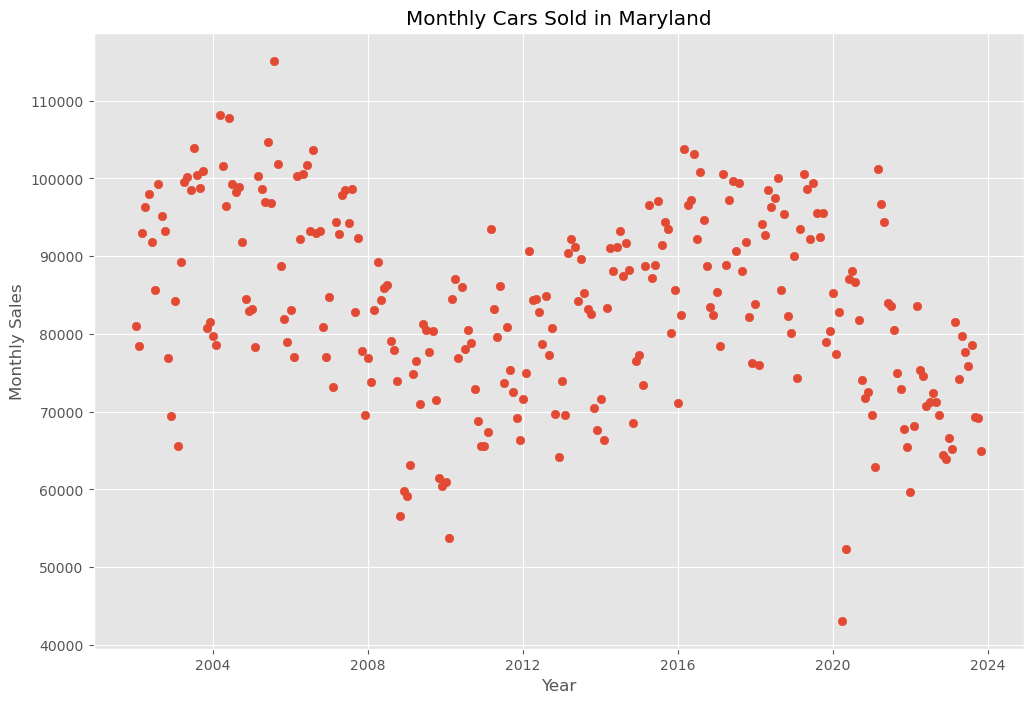

In [66]:
#Create a plot of monthly sales in Maryland
scatterplot(monthly_data.index,monthly_data['total_cars_sold'], 'Monthly Cars Sold in Maryland', 'Year','Monthly Sales')

The time series represents the combination of Used Cars Sold and New Cars Sold as a singular variable, Cars Sold. This creates a graph that encapsulates the number of cars sold in each month from 2002-2023. There is a clear decline in the average number of cars sold as well as some periods of major fluctuations. There is a steady decline in number of cars sold from 2002-2023 with the major fluctuation periods being observed around 2008 and 2020.

Cars Sold seem to max out during 2003-2005 and steadily decrease to low around 2008-2009 likely due to the Global Financial Crises (2007-2008).

There is a recovery in years following, yet there is another drop in sales following 2020 which is likely due to Covid-19 (2020-2023).

#### Introduction to Economic Events

The analysis of car sales trends in Maryland from 2002 to 2023 reveals significant fluctuations, some of which coincide with major economic events. Two notable events are the Global Financial Crisis of 2007-2009 and the COVID-19 pandemic of 2020-2023. 

##### Global Financial Crisis (2007-2009)

The Global Financial Crisis, triggered by the collapse of the housing market in the United States, had widespread repercussions across the global economy. The crisis led to a sharp decline in consumer confidence, tightening credit markets, and a severe economic downturn in many countries. This downturn likely contributed to the drop in car sales observed in Maryland during the years surrounding the crisis (2007-2009).

##### COVID-19 Pandemic (2020-2023)

The COVID-19 pandemic, which originated in late 2019 and spread globally in 2020, resulted in unprecedented disruptions to economic activity, travel restrictions, and lockdown measures to contain the spread of the virus. These measures had significant impacts on consumer behavior, business operations, and supply chains, leading to a contraction in economic activity and a downturn in various sectors, including the automotive industry. The observed drop in car sales in Maryland following 2020 is likely attributable, at least in part, to the economic effects of the pandemic.


#### How Global Financial Events impacted Numbers of Cars Sold

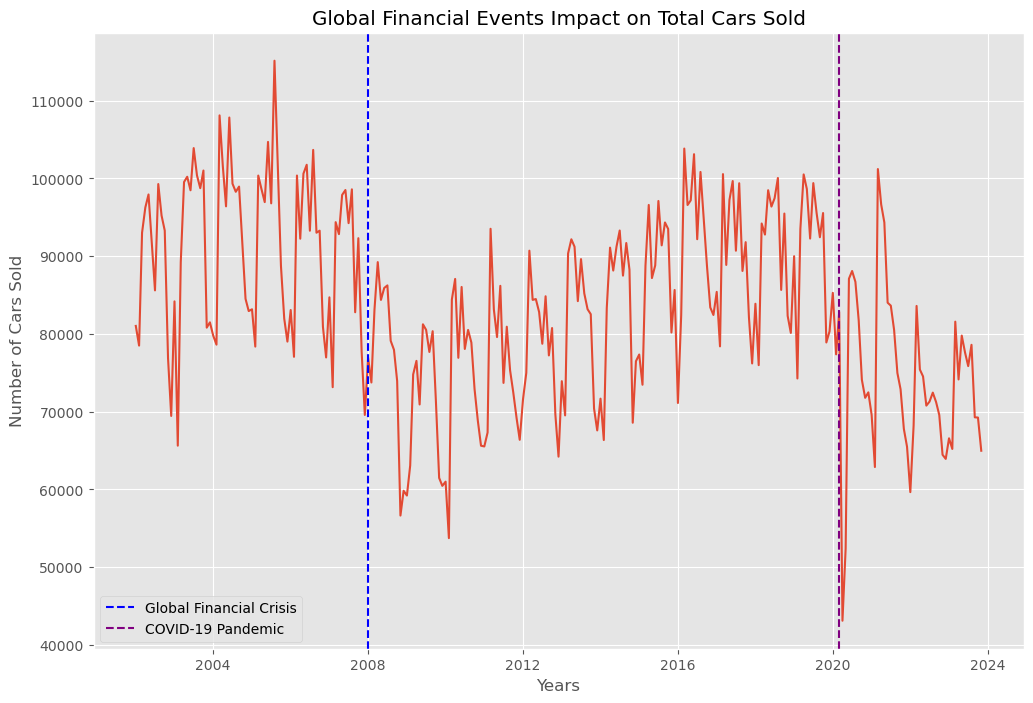

In [67]:
#To articulate the impacts of global economic events on the number of cars sold incorporate vertical lines 
#The below code is the graph to create this

from datetime import datetime
import matplotlib.pyplot as plt

plt.plot(monthly_data.index, monthly_data['total_cars_sold'])
plt.title('Global Financial Events Impact on Total Cars Sold')
plt.xlabel('Years')
plt.ylabel('Number of Cars Sold')

# Convert the date string to datetime object for Global Financial Crisis (GFC)
gfc_date = datetime.strptime('2008-01-01', '%Y-%m-%d')
# Add vertical line for GFC
plt.axvline(x=gfc_date, color='b', linestyle='--', label='Global Financial Crisis')

# Convert the date string to datetime object for COVID-19 pandemic
covid_date = datetime.strptime('2020-03-01', '%Y-%m-%d')
# Add vertical line for COVID-19 pandemic
plt.axvline(x=covid_date, color='purple', linestyle='--', label='COVID-19 Pandemic')

plt.legend(loc='best')
plt.grid(True)
plt.show()


While there are declines in both of these the nature of their changes are different. There is an increasing decline of sales between 2006 and 2010. This is because the GFC was a gradual decline in economic activity until the crash in 2008. Where as the Covid-19 crash came after a period of prolonged stability and the massive oscillations in sales is due to the shock of the impact. There seems to be an overall decreasing trend following the crises.

### Monthly Value of Cars Sold in Maryland Analysis
Observe how the monthly value of cars sold in Maryland has changed in the same time period that number of cars sold was collected. 

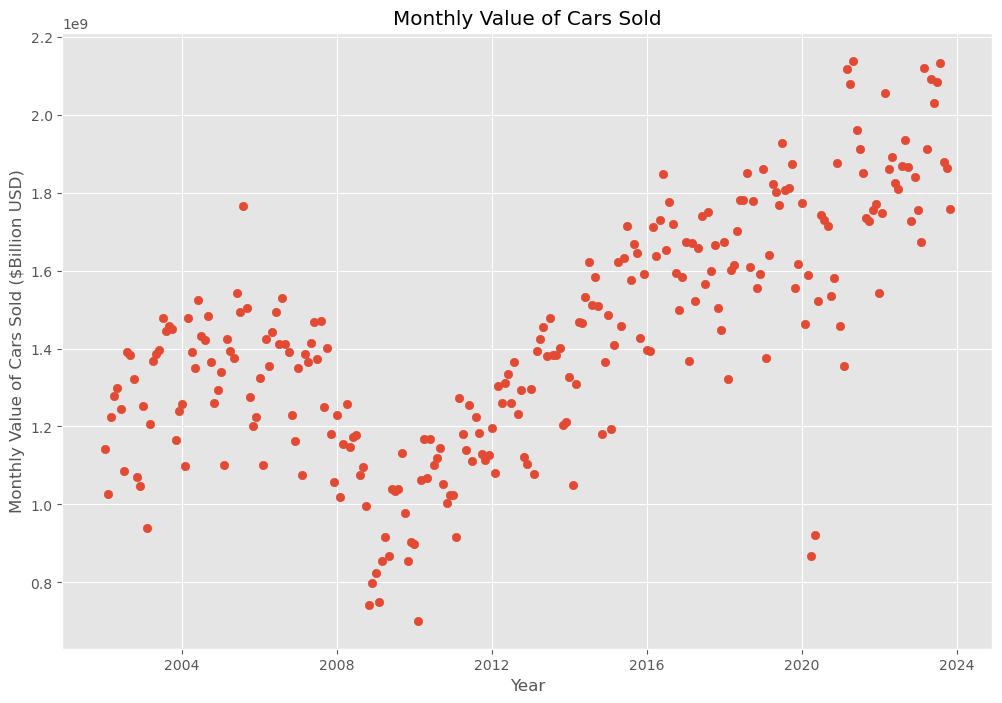

In [68]:
#Plot monthly value of cars sold
scatterplot(monthly_data.index,monthly_data['total_value_cars_sold'],'Monthly Value of Cars Sold','Year','Monthly Value of Cars Sold ($Billion USD)')

You can immediately notice the difference between the monthly number of cars sold in comparison to the monthly value of cars sold. There is a dip in value of cars sold from 2006 to 2010 however since then there has been a clear increasing trend in value of cars sold in Maryland. Another point of interest is in early stage of 2020 where the sales were the lowest that they had been in almost 10 years. Likely due to the global economic events that were discussed previously. 

### Comparison of Number of Cars Sold vs Value of Cars Sold
This comparison is fundamental to Exploratory Data Analysis as you can observe they have very different patterns. Which is something that you might not expect. Comparison will help build an understanding to make educated estimations for the parameters that influence these changing values.

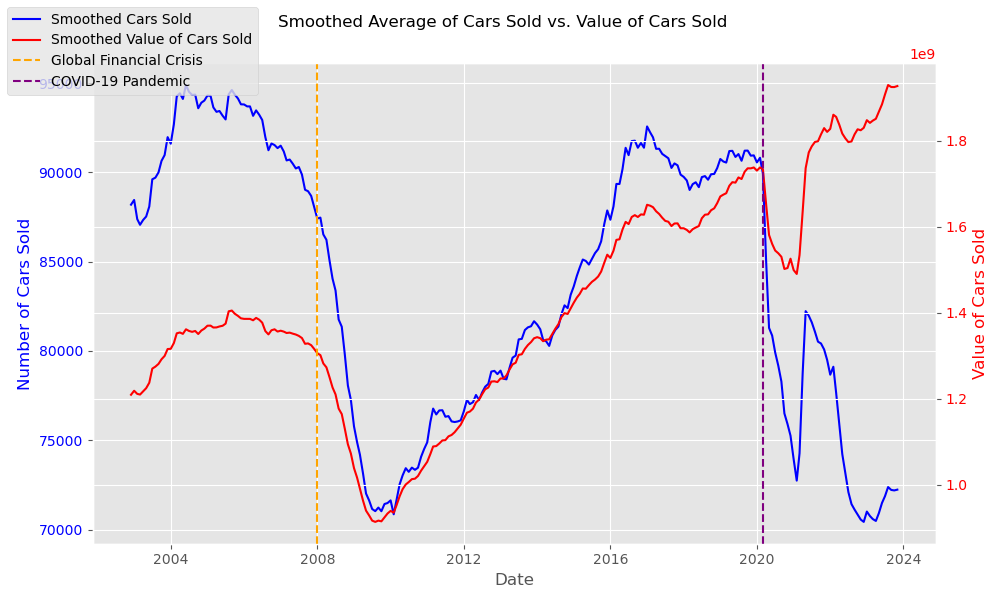

In [69]:
#Take a smoothed average of number of cars sold and value of cars sold
#Plot them on the same graph and look at the difference in movement
import matplotlib.pyplot as plt

# Assuming you have already calculated the rolling averages
yearly_rolling_total_cars_sold = monthly_data['total_cars_sold'].rolling(12).mean()
yearly_rolling_total_value_cars_sold = monthly_data['total_value_cars_sold'].rolling(12).mean()

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed

# Plotting the first variable (cars sold) on the primary y-axis
ax1.plot(monthly_data.index, yearly_rolling_total_cars_sold, label='Smoothed Cars Sold', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Cars Sold', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating a secondary y-axis for the second variable (value of cars sold)
ax2 = ax1.twinx()
ax2.plot(monthly_data.index, yearly_rolling_total_value_cars_sold, label='Smoothed Value of Cars Sold', color='red')
ax2.set_ylabel('Value of Cars Sold', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adding title and legend
fig.suptitle('Smoothed Average of Cars Sold vs. Value of Cars Sold')

plt.axvline(x=gfc_date, color='orange', linestyle='--', label='Global Financial Crisis')
plt.axvline(x=covid_date, color='purple', linestyle='--', label='COVID-19 Pandemic')
fig.legend(loc='upper left')

plt.grid(True)  # Show grid
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Using a yearly smoothed graph is going to take out seasonality which is important as we are interested in the overall trends that are taking place rather than decomposing the graph on a deeper level.

The graph takes the average number of cars sold on a monthly basis and compares it to the average value of cars sold on a monthly basis. The times can be split into 4 major sections.

1. 2002-2008
2. 2008-2010
3. 2010-2020
4. 2020-current

Question: Why did the number of cars sold have such a greater decreases than the value of cars sold?

Question: What was it about Covid-19 pandemic that made it more volatile than GFC?

Question: Why did the value of cars sold recover so quickly and number of cars sold did not?

#### Normalised Monthly Car Sales vs Value of Car Sales
The problem with the graph above is that it has two very different scales, so to create more consistiency use normalisation techniques to put it on the same scale. This technique is going to be minmaxing which puts the values into a ratio of their maximum and minimum values. This essentially models the same movement but with percentile differences from one record to the next.

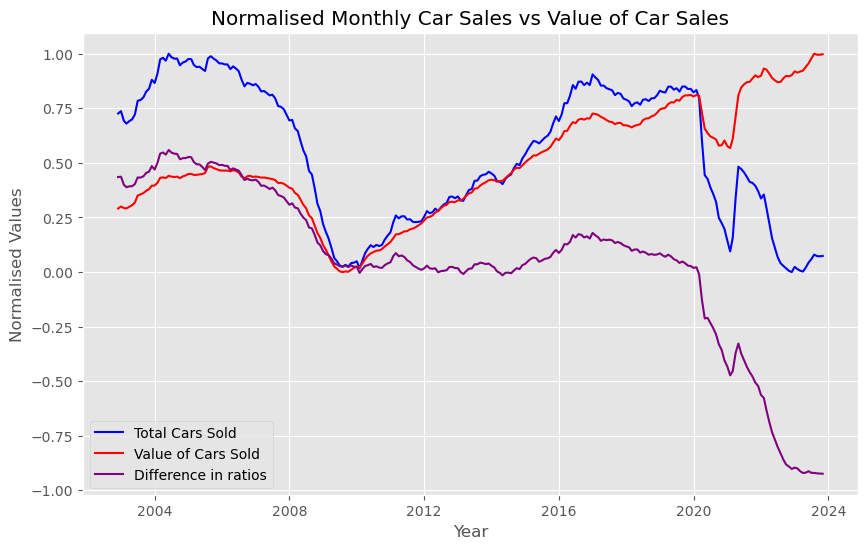

In [70]:
#Create normalised data which goes on a scale between -1 and 1 using min-maxing technique
from sklearn.preprocessing import MinMaxScaler

plt.figure(figsize=(10,6))

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

#Create a copy of the original dataframe so that it can extended
monthly_data_expanded = monthly_data.copy()

#Add the rolling means to the dataframe
monthly_data_expanded['yearly_rolling_mean_total_cars_sold'] = monthly_data_expanded['total_cars_sold'].rolling(12).mean()
monthly_data_expanded['yearly_rolling_mean_total_value_cars_sold'] = monthly_data['total_value_cars_sold'].rolling(12).mean()

# eshape the input data to 2D array-like structure
cars_sold_data = monthly_data_expanded['yearly_rolling_mean_total_cars_sold'].values.reshape(-1, 1)
value_cars_sold_data = monthly_data_expanded['yearly_rolling_mean_total_value_cars_sold'].values.reshape(-1, 1)

#Apply Min-Max Scaling to the data rolling means
monthly_data_expanded['normalised_yearly_rolling_mean_total_cars_sold']= scaler.fit_transform(cars_sold_data)
monthly_data_expanded['normalised_yearly_rolling_mean_total_value_cars_sold'] = scaler.fit_transform(value_cars_sold_data)

#Find the difference between the two rolling averages
monthly_data_expanded['difference_normalised_yearly_rolling_mean'] = monthly_data_expanded['normalised_yearly_rolling_mean_total_cars_sold'] - monthly_data_expanded['normalised_yearly_rolling_mean_total_value_cars_sold']

#Plot the normalised data
plt.plot(monthly_data_expanded.index, monthly_data_expanded['normalised_yearly_rolling_mean_total_cars_sold'], color = 'b', label='Total Cars Sold')
plt.plot(monthly_data_expanded.index, monthly_data_expanded['normalised_yearly_rolling_mean_total_value_cars_sold'], color = 'r', label='Value of Cars Sold')
plt.plot(monthly_data_expanded.index,monthly_data_expanded['difference_normalised_yearly_rolling_mean'],color = 'purple', label='Difference in ratios')
plt.title('Normalised Monthly Car Sales vs Value of Car Sales')
plt.xlabel('Year')
plt.ylabel('Normalised Values')

plt.legend()

1. 2002-2008: Both Cars Sold and Value of Cars Sold follow a very similar trend which shows an a downward trend leading up to the events of 2008.
2. 2008-2010: There is a massive drop following 2008 which is likely due to the gfc (this is going to be explored later), number of cars sold seemed to have a greater impact than the value of cars sold. You can see that the difference in ratios decreases from about 0.5 to 0 which is where all three of the graphs meet. 
3. 2010-2020: Both cars sold and value of cars sold follow almost the exact same growth rate which explains the ratio staying below 0.2. However, there is a small increase in the number of cars sold which might suggest that number of cars sold are impacted more by a particular variable. Perhaps it is the state of the economy such as GDP?
4. 2020-current: This graph once again details the shocking impact the Covid-19 Pandemic had on markets. The ration between the two shows a very strong negative relationship where there was a period of stability between thw two when they recovered at similar rates between 2010 and 2020. However, the impact of the Covid-19 Pandemic resulted in the value of cars sold having an extremely fast recovery to continue its upward trend while number of cars sold seems to have tkane a massive hit and has not recovered.

#### Line of Best Fit
Finding the line of best fit is going to represent the overall trend which minimses the amount of movement above and beyond a linear line. 

In [71]:
#Turn the time series data into incrementing months so that you can perform linear regression on the data
monthly_data_expanded_dropped_na = monthly_data_expanded.copy()
monthly_data_expanded_dropped_na.dropna(inplace=True)
monthly_data_expanded_dropped_na.reset_index(inplace=True)
convert_to_incrementing_months(monthly_data_expanded_dropped_na,'month')

,month,new_cars_sold,used_cars_sold,values_new_cars_sold,value_used_cars_sold,total_cars_sold,total_value_cars_sold,inflation_rate_cpi,unemployment_rate_not_sa,unemployment_rate_sa,yearly_rolling_mean_total_cars_sold,yearly_rolling_mean_total_value_cars_sold,normalised_yearly_rolling_mean_total_cars_sold,normalised_yearly_rolling_mean_total_value_cars_sold,difference_normalised_yearly_rolling_mean,year,incrementing_months
0,12,26994,42461,673208880,374453368,69455,1047662248,1.9,4.3,4.6,88187.750000,1.209397e+09,0.726090,0.290991,0.435099,2002,12
1,1,34707,49481,860730784,392438833,84188,1253169617,1.9,5.0,4.7,88450.666667,1.218703e+09,0.736841,0.300147,0.436694,2003,13
2,2,24585,41048,615749948,323297077,65633,939047025,1.7,5.1,4.8,87378.250000,1.211473e+09,0.692988,0.293034,0.399955,2003,14
3,3,32705,56513,791728069,413899574,89218,1205627643,1.7,5.0,4.8,87061.500000,1.209854e+09,0.680036,0.291441,0.388595,2003,15
4,4,37682,61856,909778220,458127973,99538,1367906193,1.5,4.6,4.9,87333.916667,1.217227e+09,0.691176,0.298695,0.392480,2003,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,7,26360,49502,1196918451,887723892,75862,2084642343,4.7,1.7,1.8,71871.000000,1.908111e+09,0.058870,0.978463,-0.919592,2023,259
248,8,25876,52725,1222581892,908454060,78601,2131035952,4.3,1.8,1.7,72383.166667,1.930000e+09,0.079814,1.000000,-0.920186,2023,260
249,9,23892,45386,1134437699,744676584,69278,1879114283,4.1,1.8,1.6,72219.750000,1.925336e+09,0.073131,0.995411,-0.922279,2023,261
250,10,23775,45473,1122680147,740582533,69248,1863262680,4.0,2.1,1.7,72192.083333,1.925200e+09,0.072000,0.995277,-0.923277,2023,262


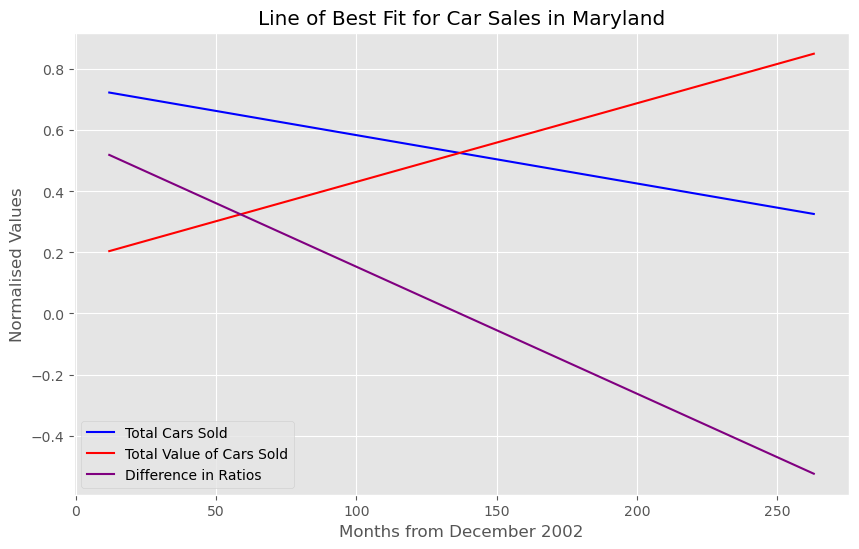

In [72]:
#Find the line of best fit
plt.figure(figsize=(10,6))
total_cars_sold_ratios_lbf = find_line_of_best_fit(monthly_data_expanded_dropped_na['normalised_yearly_rolling_mean_total_cars_sold'])
total_value_cars_sold_ratios_lbf = find_line_of_best_fit(monthly_data_expanded_dropped_na['normalised_yearly_rolling_mean_total_value_cars_sold'])
cars_sold_value_cars_sold_difference_ratios_lbf = find_line_of_best_fit(monthly_data_expanded_dropped_na['difference_normalised_yearly_rolling_mean'])

#Plot the line of best fits
plt.plot(monthly_data_expanded_dropped_na['incrementing_months'],total_cars_sold_ratios_lbf[0]*monthly_data_expanded_dropped_na['incrementing_months'] + total_cars_sold_ratios_lbf[1],color='blue',label='Total Cars Sold')
plt.plot(monthly_data_expanded_dropped_na['incrementing_months'],total_value_cars_sold_ratios_lbf[0]*monthly_data_expanded_dropped_na['incrementing_months'] + total_value_cars_sold_ratios_lbf[1],color='red',label='Total Value of Cars Sold')
plt.plot(monthly_data_expanded_dropped_na['incrementing_months'],cars_sold_value_cars_sold_difference_ratios_lbf[0]*monthly_data_expanded_dropped_na['incrementing_months'] + cars_sold_value_cars_sold_difference_ratios_lbf[1],color='purple', label='Difference in Ratios')
plt.title('Line of Best Fit for Car Sales in Maryland')
plt.xlabel('Months from December 2002')
plt.ylabel('Normalised Values')
plt.legend()

In [73]:
ratios_car_sales_lbf = pd.DataFrame()
row_names = ['Total Cars Sold', 'Total Value of Cars Sold', 'Difference in Ratios']
#Find the yearly slope (multiply the monthly slope by 12)
ratios_car_sales_lbf['Slope'] = [total_cars_sold_ratios_lbf[0]*12,total_value_cars_sold_ratios_lbf[0]*12, cars_sold_value_cars_sold_difference_ratios_lbf[0]*12]
ratios_car_sales_lbf['Intercept'] = [total_cars_sold_ratios_lbf[1], total_value_cars_sold_ratios_lbf[1], cars_sold_value_cars_sold_difference_ratios_lbf[1]]
ratios_car_sales_lbf = ratios_car_sales_lbf.rename(index=dict(zip(ratios_car_sales_lbf.index, row_names)))
ratios_car_sales_lbf

,Slope,Intercept
Total Cars Sold,-0.019018,0.742890
Total Value of Cars Sold,0.030919,0.173391
Difference in Ratios,-0.049937,0.569499


Having the lines of best fit by themselves on the graph, is the best way to isolate and understand the linear trends. The slope values of cars sold is negative (-0.019018) while the value of cars sold is positive (0.030919) which suggests that value of cars sold is increasing about 50% faster than the total cars sold is decreasing. Which is resulting in a 0.05 decrement for each passing month.

### Understanding the difference in Number of Cars Sold and Value of Cars Sold

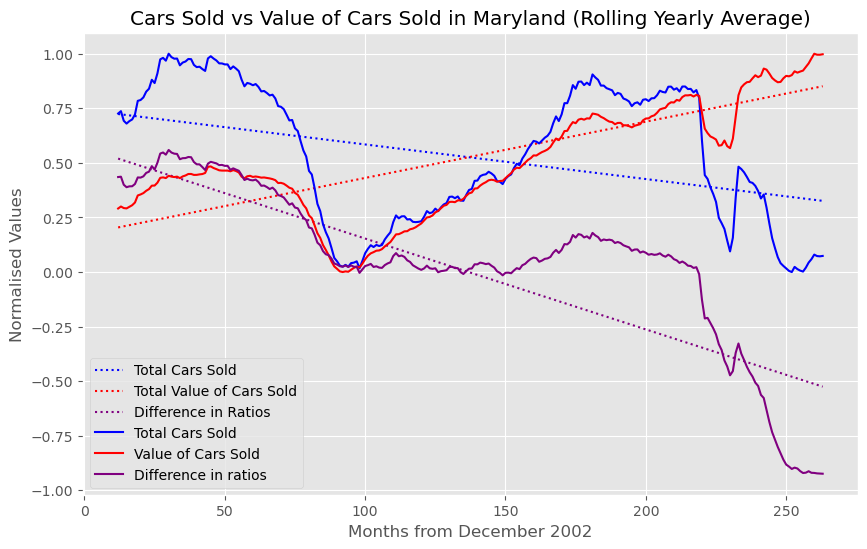

In [74]:
#Find the line of best fit
plt.figure(figsize=(10,6))
total_cars_sold_ratios_lbf = find_line_of_best_fit(monthly_data_expanded_dropped_na['normalised_yearly_rolling_mean_total_cars_sold'])
total_value_cars_sold_ratios_lbf = find_line_of_best_fit(monthly_data_expanded_dropped_na['normalised_yearly_rolling_mean_total_value_cars_sold'])
cars_sold_value_cars_sold_difference_ratios_lbf = find_line_of_best_fit(monthly_data_expanded_dropped_na['difference_normalised_yearly_rolling_mean'])

#Plot the line of best fits
plt.plot(monthly_data_expanded_dropped_na['incrementing_months'],total_cars_sold_ratios_lbf[0]*monthly_data_expanded_dropped_na['incrementing_months'] + total_cars_sold_ratios_lbf[1],color='blue',label='Total Cars Sold',linestyle='dotted')
plt.plot(monthly_data_expanded_dropped_na['incrementing_months'],total_value_cars_sold_ratios_lbf[0]*monthly_data_expanded_dropped_na['incrementing_months'] + total_value_cars_sold_ratios_lbf[1],color='red',label='Total Value of Cars Sold',linestyle='dotted')
plt.plot(monthly_data_expanded_dropped_na['incrementing_months'],cars_sold_value_cars_sold_difference_ratios_lbf[0]*monthly_data_expanded_dropped_na['incrementing_months'] + cars_sold_value_cars_sold_difference_ratios_lbf[1],color='purple', label='Difference in Ratios',linestyle='dotted')
plt.plot(monthly_data_expanded_dropped_na['incrementing_months'], monthly_data_expanded_dropped_na['normalised_yearly_rolling_mean_total_cars_sold'], color = 'b', label='Total Cars Sold')
plt.plot(monthly_data_expanded_dropped_na['incrementing_months'], monthly_data_expanded_dropped_na['normalised_yearly_rolling_mean_total_value_cars_sold'], color = 'r', label='Value of Cars Sold')
plt.plot(monthly_data_expanded_dropped_na['incrementing_months'],monthly_data_expanded_dropped_na['difference_normalised_yearly_rolling_mean'],color = 'purple', label='Difference in ratios')
plt.title('Cars Sold vs Value of Cars Sold in Maryland (Rolling Yearly Average)')
plt.xlabel('Months from December 2002')
plt.ylabel('Normalised Values')
plt.legend()

The two major insights from the EDA above are
1. Impact of Global Economic Events: The analysis reveals that significant global economic events, such as the Global Financial Crisis (GFC) and the COVID-19 pandemic, have had adverse effects on the automotive industry. These events coincide with downturns in both the number of cars sold and the value of cars sold, indicating the vulnerability of the industry to macroeconomic shocks.

2. Shift in Sales Dynamics: Another key insight is the observed trend over the past two decades, showing a relative decrease in the number of cars sold compared to the value of cars sold. This shift suggests changes in consumer preferences, purchasing behavior, or market dynamics that have led to a greater emphasis on higher-value vehicles or increased pricing of cars over time.

Questions:

1. Why did the number of cars sold decrease but the value of cars sold increased?

2. Why was the market response to the GFC so different to the COVID-19 Pandemic?

### Average Transaction Value Per Car in Maryland
The average transaction value is calculated by taking the value of cars sold and dividing that by the number of cars sold. This will give an average price across the month of the average value of transactions. This is somewhat reflective of what you could assume is the average price of a car but you cannot say that for certain, that this metric is what represents that.

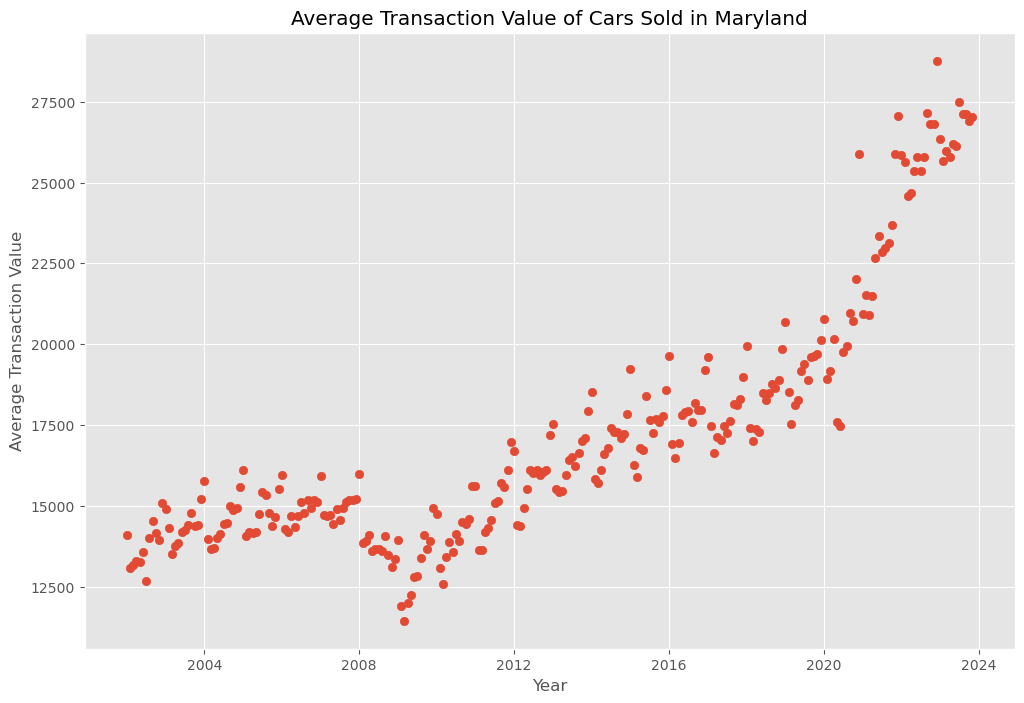

In [75]:
#Create a new column in the table that is called 'average_transaction_value' 
#Take the total_value_cars_sold series / total_cars_sold and this will create the average price per month
monthly_data_expanded['average_transaction_value'] = monthly_data_expanded['total_value_cars_sold'] / monthly_data_expanded['total_cars_sold']
scatterplot(monthly_data_expanded.index,monthly_data_expanded['average_transaction_value'],'Average Transaction Value of Cars Sold in Maryland','Year','Average Transaction Value')

There is a general trend that takes place from 2002 to 2020 where besides a small dip due to the GFC, the Average Transaction Value increases. Until Covid-19 had its impact on global economies and resulted in the average transaction value to sky rocket and show a much greater growth rate.

### Bivariate Analysis
Total cars sold and value of cars sold has been explored and there is a clear difference. The next step is to look at other relationships between other variables. This will be important to understand what to include in the analysis. Using a correlation matrix to explore the relationship between different varibles can help to understand the data. At this point yearly data which has far more variables is also going to be explored.

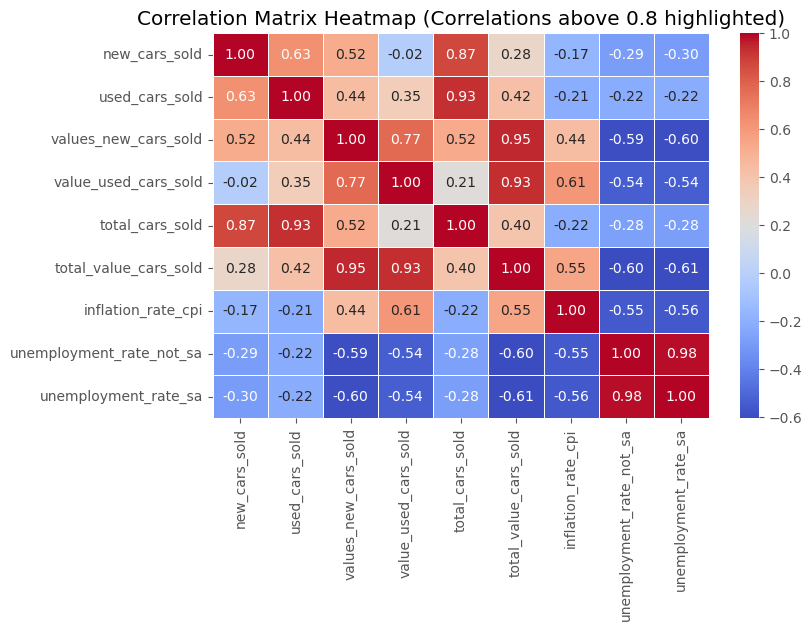

In [76]:
#Create a heat map correlation matrix to understand which variables are related to one another. 
#This can be done for dimensionality reduction
plt.figure(figsize=(8, 5))
monthly_matrix = monthly_data.corr()

sns.heatmap(monthly_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap (Correlations above 0.8 highlighted)')
plt.show()

The monthly correlation matrix can be used to understand which variables are highly related to one another. Once this is understood, it can assumed that there will be a similar impact of one variable on another. The columns below have at least 0.8 as their correlation

1. Unemployment Rate Seasonally Adjusted and Not Seasonally Adjusted 
2. Total Cars Sold & Used/New Cars Sold 
3. Total Value Cars Sold & Value Used/New Cars Sold

In [77]:
#Import the yearly data and print some of the data
yearly_data = pd.read_csv('/Users/ben_nicholson/Visual_Code_Projects/Personal_Projects/Maryland Car Sales Data/maryland_economics_database/combined_tables/yearly_car_sales_all_data.csv')
yearly_data.head(5)

,average_annual_pay,gdp_maryland,inflation_rate_cpi,average_weekly_wage,total_wages_thousands,maryland_population,total_workforce,year,new_cars_sold,used_cars_sold,value_new_cars_sold,value_used_cars_sold,total_cars_sold,total_value_cars_sold
0,39382,217837100000,2.4,757,95589510000,5440389,2427396,2002-01-01,402164,656089,9572554876,4940209772,1058253,14512764648
1,40686,228959300000,1.4,782,99039956000,5496269,2434480,2003-01-01,428252,675358,10623148339,5166071497,1103610,15789219836
2,42579,245124500000,1.8,819,104716511000,5546935,2461074,2004-01-01,428508,699677,10972956024,5385548947,1128185,16358504971
3,44368,262100000000,2.2,853,110807924000,5592379,2497416,2005-01-01,421834,703835,11006733922,5639803515,1125669,16646537437
4,46162,274145300000,2.5,888,116791342000,5627367,2530129,2006-01-01,399282,696968,10411657206,5865687318,1096250,16277344524


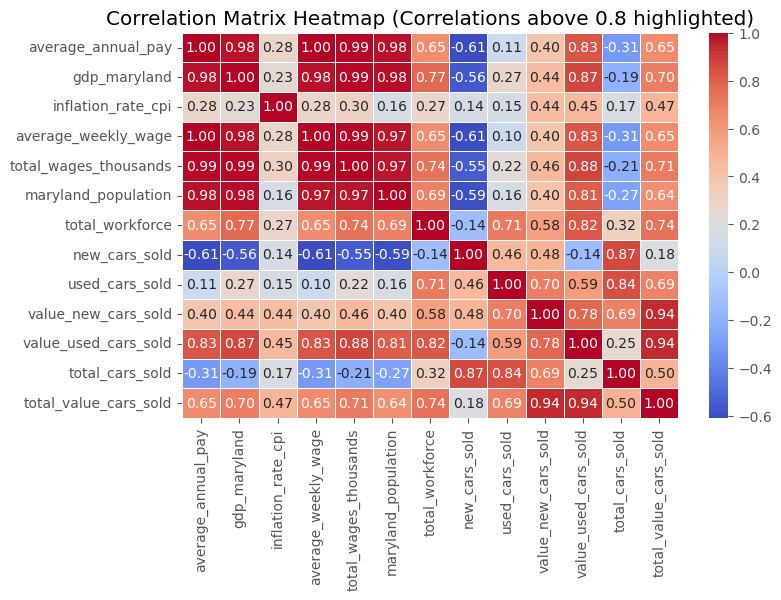

In [78]:
#Create a correlation matrix of the variables
#There are more economic and socio economic data
plt.figure(figsize=(8,5))
yearly_matrix = yearly_data.corr()

sns.heatmap(yearly_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap (Correlations above 0.8 highlighted)')
plt.show()

The yearly data from the database has more variables that can be considered. These can be included in the monthly data but it will have to be done using interpolated data which is not reflective of real life. Regardless, the correlation matrix displays that the economic factors all follow very similar trends hence most of them following at least a 0.97 correlation. 

### Comparison of New and Used Cars
As the total cars sold and value of cars sold is a combination of new cars and used cars, it is important to understand their relationship. In order to delve deeper, keep the rolling averages of new and used cars for both values and total number of cars sold.

In [86]:
#Create yearly rolling value of cars sold
monthly_data_expanded['yearly_rolling_total_value_cars_sold'] = yearly_rolling_total_value_cars_sold

#Create yearly rolling averages of cars and values of cars sold for new and used cars
monthly_data_expanded['yearly_rolling_new_cars_sold'] = (monthly_data_expanded['new_cars_sold']).rolling(12).mean()
monthly_data_expanded['yearly_rolling_used_cars_sold'] = (monthly_data_expanded['used_cars_sold']).rolling(12).mean()
monthly_data_expanded['yearly_rolling_value_new_cars_sold'] = (monthly_data_expanded['values_new_cars_sold']).rolling(12).mean()
monthly_data_expanded['yearly_rolling_value_used_cars_sold'] = (monthly_data_expanded['value_used_cars_sold']).rolling(12).mean()

#Create the new columns that contain the proportion of new & used cars for total number of cars sold
monthly_data_expanded['yearly_rolling_new_proportion_total_cars'] = monthly_data_expanded['yearly_rolling_new_cars_sold'] / monthly_data_expanded['yearly_rolling_mean_total_cars_sold']
monthly_data_expanded['yearly_rolling_used_proportion_total_cars'] = monthly_data_expanded['yearly_rolling_used_cars_sold'] / monthly_data_expanded['yearly_rolling_mean_total_cars_sold']
monthly_data_expanded['yearly_rolling_new_proportion_value_total_cars'] = monthly_data_expanded['yearly_rolling_value_new_cars_sold'] / monthly_data_expanded['yearly_rolling_total_value_cars_sold']
monthly_data_expanded['yearly_rolling_used_proportion_value_total_cars'] = monthly_data_expanded['yearly_rolling_value_used_cars_sold'] / monthly_data_expanded['yearly_rolling_total_value_cars_sold']

#Create normalised versions of the above
monthly_data_expanded['normalised_yearly_rolling__new_cars'] = normalize_time_series_df('yearly_rolling_new_cars_sold',monthly_data_expanded)
monthly_data_expanded['normalised_yearly_rolling_used_cars'] = normalize_time_series_df('yearly_rolling_used_cars_sold',monthly_data_expanded)
monthly_data_expanded['normalised_yearly_rolling_new_value_cars'] = normalize_time_series_df('yearly_rolling_value_new_cars_sold',monthly_data_expanded)
monthly_data_expanded['normalised_yearly_rolling_used_value_cars'] = normalize_time_series_df('yearly_rolling_value_used_cars_sold',monthly_data_expanded)

monthly_data_expanded

,new_cars_sold,used_cars_sold,values_new_cars_sold,value_used_cars_sold,total_cars_sold,total_value_cars_sold,inflation_rate_cpi,unemployment_rate_not_sa,unemployment_rate_sa,yearly_rolling_mean_total_cars_sold,...,yearly_rolling_value_used_cars_sold,yearly_rolling_new_proportion_total_cars,yearly_rolling_used_proportion_total_cars,yearly_rolling_new_proportion_value_total_cars,yearly_rolling_used_proportion_value_total_cars,normalised_yearly_rolling__new_cars,normalised_yearly_rolling_used_cars,normalised_yearly_rolling_new_value_cars,normalised_yearly_rolling_used_value_cars,yearly_rolling_total_value_cars_sold
month,,,,,,,,,,,,,,,,,,,,,
2002-01-01,31106,49927,755015820,386481929,81033,1141497749,2.6,5.5,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-02-01,27520,50982,664454223,361353242,78502,1025807465,2.6,5.2,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-03-01,34225,58794,805666244,419385387,93019,1225051631,2.4,5.1,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-04-01,36452,59817,846368297,433061150,96269,1279429447,2.5,4.9,4.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-05-01,37359,60577,855005784,442569410,97936,1297575194,2.5,4.7,4.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01,26360,49502,1196918451,887723892,75862,2084642343,4.7,1.7,1.8,71871.000000,...,8.004691e+08,0.335713,0.664287,0.580491,0.419509,0.225779,0.015584,0.950623,0.926198,1.908111e+09
2023-08-01,25876,52725,1222581892,908454060,78601,2131035952,4.3,1.8,1.7,72383.166667,...,8.072109e+08,0.337116,0.662884,0.581756,0.418244,0.242659,0.030295,0.976164,0.940697,1.930000e+09
2023-09-01,23892,45386,1134437699,744676584,69278,1879114283,4.1,1.8,1.6,72219.750000,...,7.993700e+08,0.338976,0.661024,0.584815,0.415185,0.247550,0.015337,0.981520,0.923834,1.925336e+09


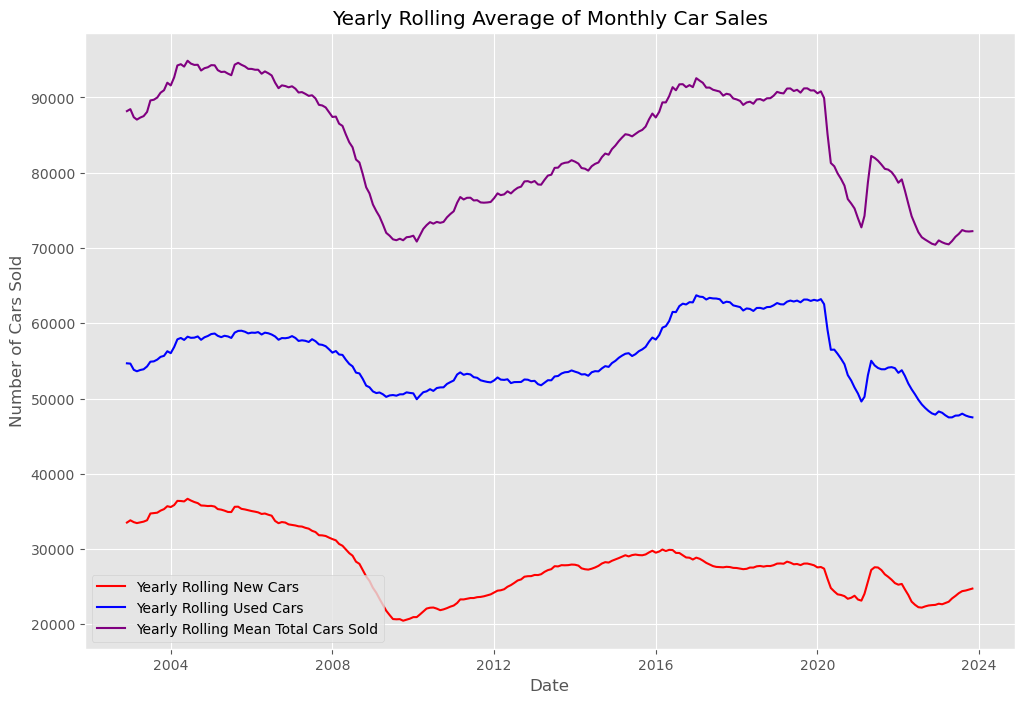

In [91]:
#This should suggest the difference in car sales segmented on new compared to used
# Plot the data
plt.plot(monthly_data_expanded.index, monthly_data_expanded['yearly_rolling_new_cars_sold'], label='Yearly Rolling New Cars', color='red')
plt.plot(monthly_data_expanded.index, monthly_data_expanded['yearly_rolling_used_cars_sold'], label='Yearly Rolling Used Cars', color='blue')
plt.plot(monthly_data_expanded.index, monthly_data_expanded['yearly_rolling_mean_total_cars_sold'], label='Yearly Rolling Mean Total Cars Sold', color='purple')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Number of Cars Sold')
plt.title('Yearly Rolling Average of Monthly Car Sales')
plt.legend()
plt.show()

If you observe the number of new cars sold compared to the number of used cars sold it can be observed that they follow very similar trends. The major difference obviously being that the number of used cars that are purchased have a higher value than the new cars sold. This movement similarity concludes the correlation matrix's value of 0.87 and 0.93 for new cars sold and used cars sold respectively. The points of difference can be observed in the graph below.

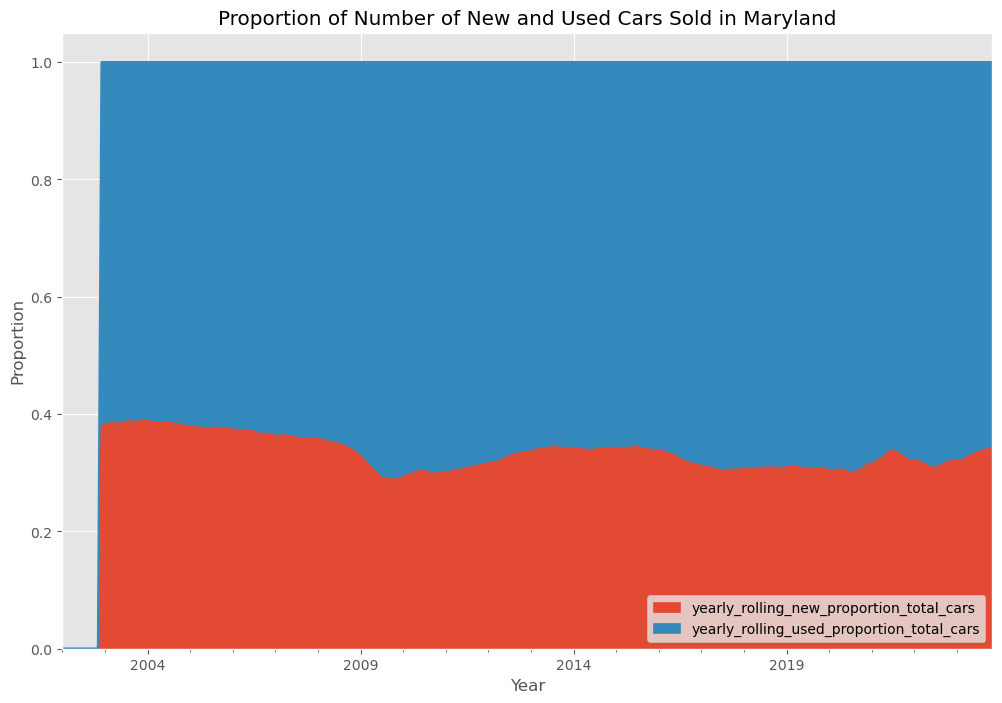

In [92]:
#Create a stacked plot of the used vs new total cars sold proportion
monthly_data_expanded[['yearly_rolling_new_proportion_total_cars', 'yearly_rolling_used_proportion_total_cars']].plot(kind='area', stacked=True)
plt.title('Proportion of Number of New and Used Cars Sold in Maryland')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.show()

There is no clear movement. It looks quite like white noise with a few periods of fluctuations. For example in 2009 the number of new cars sold dropped dramatically likely due to the decrease in economic activity. There was an increase in 2020 for the number of new cars sold which is because the price of used cars increased a lot during this period of time.

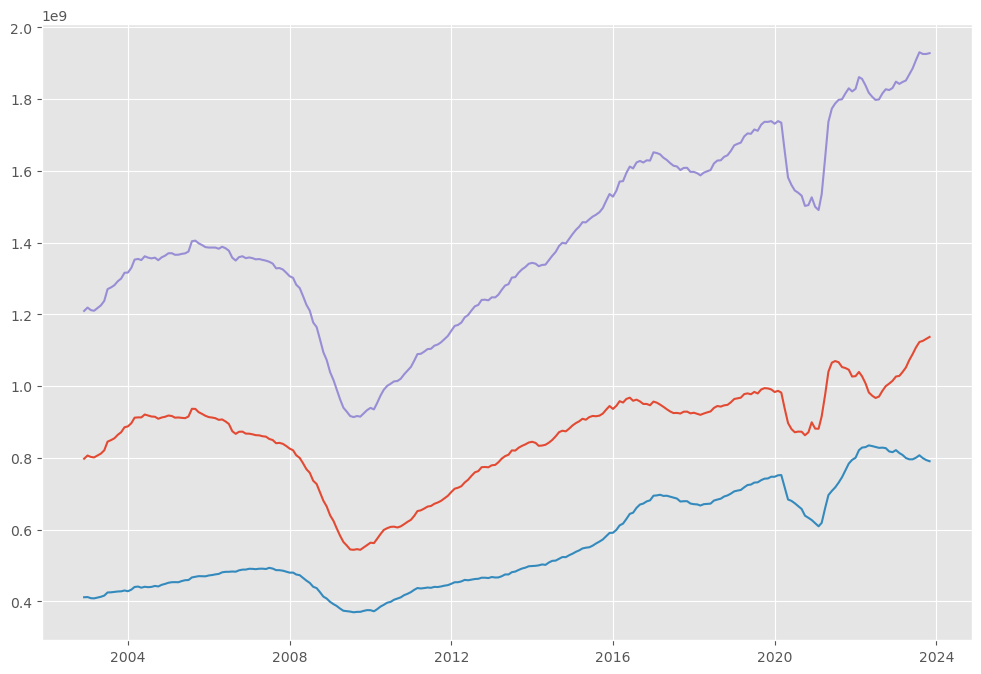

In [95]:
plt.plot(monthly_data_expanded.index, monthly_data_expanded['yearly_rolling_value_new_cars_sold'])
plt.plot(monthly_data_expanded.index,monthly_data_expanded['yearly_rolling_value_used_cars_sold'])
plt.plot(monthly_data.index,monthly_data_expanded['yearly_rolling_total_value_cars_sold'])

Similar to the number of cars sold graph, there is a very similar trend in movement. This is also represented in the high correlation values as seen in the correlaiton matrix. As the number of new cars sold which are more expensive is not increasing at a faster rate than used cars the increase in value of total cars while number of cars sold is decreasing can not be explained.

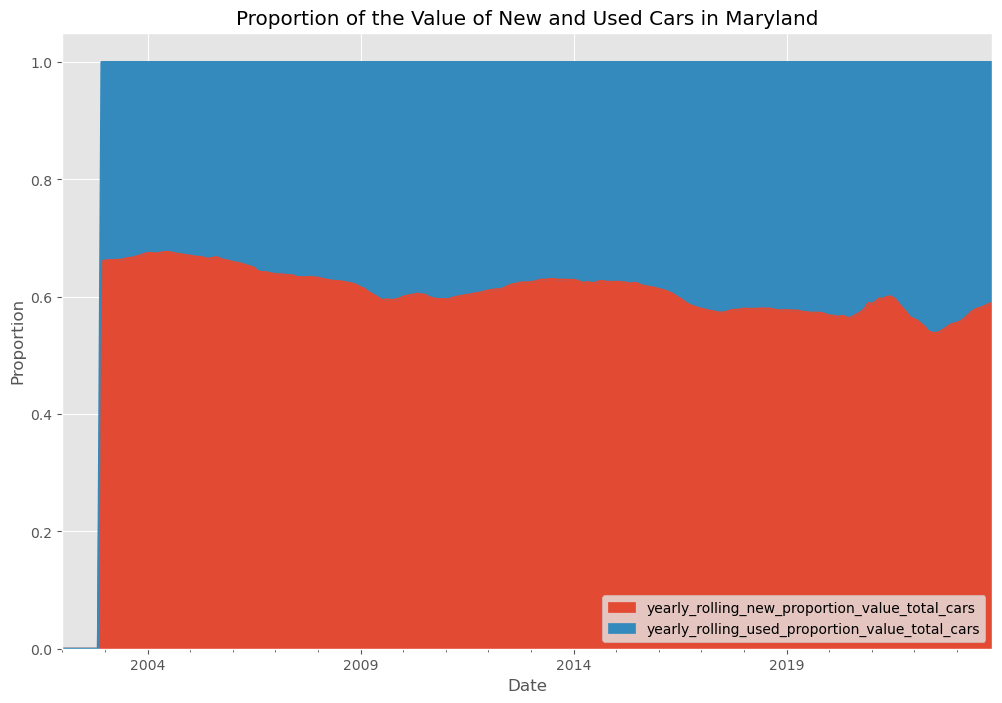

In [96]:
#Create a stacked plot of the used vs new total cars sold proportion
monthly_data_expanded[['yearly_rolling_new_proportion_value_total_cars', 'yearly_rolling_used_proportion_value_total_cars']].plot(kind='area', stacked=True)
plt.title('Proportion of the Value of New and Used Cars in Maryland')
plt.xlabel('Date')
plt.ylabel('Proportion')
plt.show()

The value of new and used cars sold follow a very similar pattern. This is reflected well in the proportion of new vs used cars sold. When the proportions do not indicate any major changes this reflects that the pattern of new and used value of cars sold is similar. There is one period of major difference however, this is during 2020 where the value of new cars sold spiked a lot higher than the used cars sold. This is likely due to the cost of used cars increasing leading to a lot of people taking the opportunity to purchase a new car rather than used. Another difference is that the variable of used cars sold is much smaller and follows more of a linear trend from 2003 to 2023.